# Homework 9: Mediation & Power Analyses

This homework assignment is designed to give you practice with mediation, and with using Monte Carlo methods to conduct power analyses via simulation. You won't need to load in any data for this homework.

---
## 1. Simulating data (2 points)


In this homework, we're going to simulate the relationship between age, word reading experience, and reading comprehension skill. Older children tend to be better at reading comprehension tasks, but this isn't just an inherent part of getting older. It's a combination of gaining more experience with reading, oral language skills, and executive functions development. In this homework, though, we're going to simplify this relationship down to a direct effect of age on reading comprehension (since improvements in oral language skills and executive functions are more guaranteed as children age than reading practice is), and a mediation of word reading experience.

In graphical form: 
![picture](https://drive.google.com/uc?id=1wdm9xuiJhBJor99-9GnicO2_rzkGWtfN)

Writing the relationship out formally: 

$$x = \beta_{xa} a + \beta_{x0} + \epsilon_{x}$$

$$c = \beta_{ca} a + \beta_{cx} x + \beta_{c0} + \epsilon_c$$



$c$ is reading comprehension, $x$ is word reading experience, and $a$ is age. $\beta_{c0}$ and $\beta_{x0}$ are intercept terms for their respective formulas, and $\epsilon_{c}$ and $\epsilon_{x}$ are gaussian noise terms. We'll start by writing a function, `simulate_data`, that can simulate this relationship. The input values are set and the function structure is provided below. Complete the function such that it takes in those input variables and generates $age$, $x$, and $c$ values. Use `runif()` to generate ages. Use `rnorm()` to generate the noise terms. 

In [50]:
sample_size = 100 # How many children in data set? 
age_lo = 80     # minimum age, in months (6-16yo)
age_hi = 200    # maximum age, in months
beta_xa = 0.5   # amount by which experience changes for increase of one month in age
beta_x0 = -5    # amount of experience when age = 0 (not interpretable, since minimum age for this data is 80 months)
sd_x = 50       # standard dev of gaussian noise term, epsilon_x
beta_ca = 0.8   # amount that comprehension score improves for every increase of one unit in age
beta_cx = 3     # amount that comprehension score improves for every increase of one unit in reading experience
beta_c0 = 10    # comprehension score when reading experience is 0. 
sd_c = 85       # standard dev of gaussian noise term, epsilon_c

set.seed(30)

simulate_data <- function(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
    
  age = runif(sample_size, age_lo, age_hi)
    # x = rnorm(sample_size, mean=0, sd_x) #x is word reading experience
    x = beta_xa*age + beta_x0+ rnorm(sample_size, sd=sd_x)
    c = beta_ca*age + beta_cx*x + beta_c0 + rnorm(sample_size, sd=sd_c)
    # c = rnorm(sample_size, mean=0, sd_c) #c is reading comprehension
  
  return(data.frame(age=age,x=x,c=c)) # it's actually bad form to have a variable named "c" in R, my bad...
}

dat <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
head(dat)


,age,x,c
,<dbl>,<dbl>,<dbl>
1,91.85394,-1.521621,13.84287
2,138.58781,70.454808,321.49354
3,123.68441,25.858022,105.52641
4,130.47430,-25.448915,-10.58680
5,116.11573,88.849247,395.21663
6,97.71622,-1.918217,-54.65758


---
## 2. Visualizing Data (1 point)

Load the `tidyverse` library.

In [9]:
library(tidyverse)

a) Plot the relationship between age and reading comprehension. 

`geom_smooth()` using formula 'y ~ x'



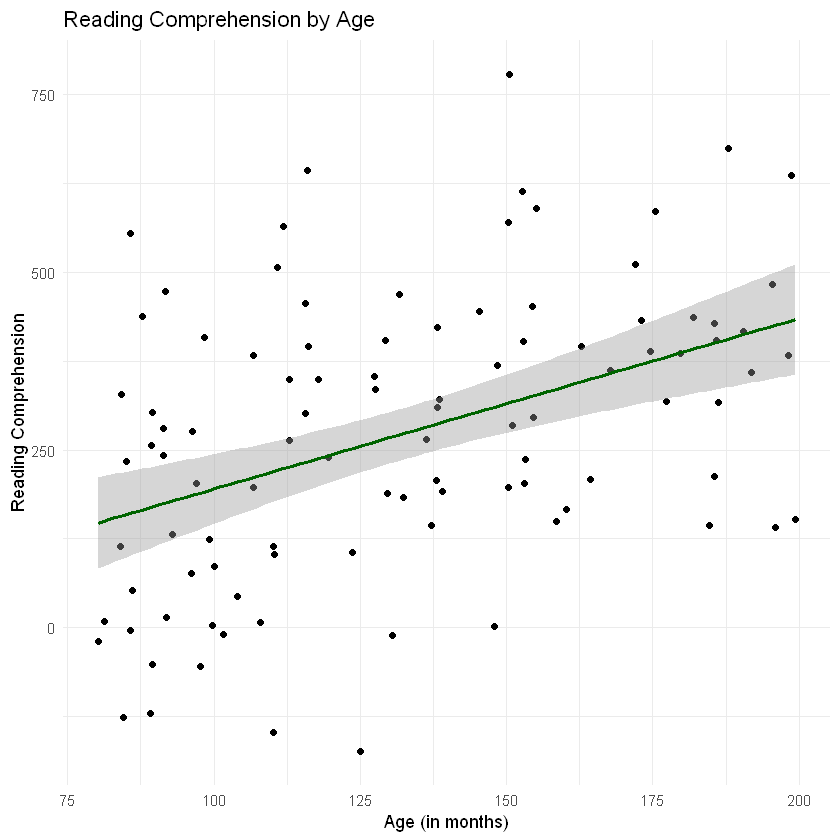

In [51]:
ggplot(dat, aes(age, c)) +
  geom_point() + 
  geom_smooth(method="lm", colour="darkgreen") +
  theme_minimal() +
  labs(title = "Reading Comprehension by Age", x = "Age (in months)", y="Reading Comprehension") 


b) Plot the relationship between reading experience, age, and reading comprehension.

`geom_smooth()` using formula 'y ~ x'



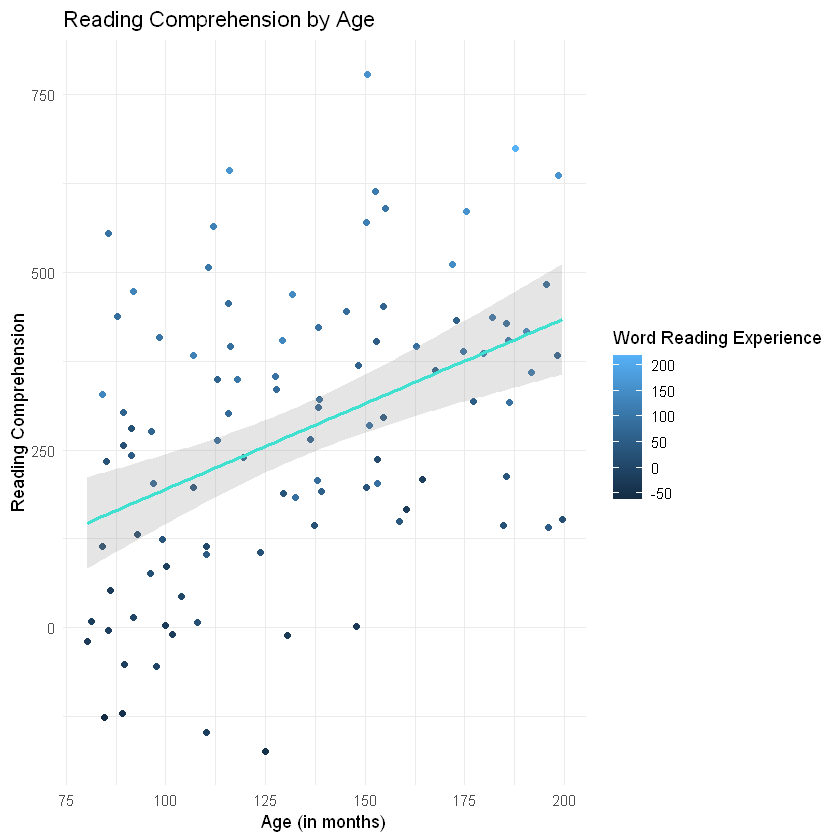

In [52]:
ggplot(dat, aes(age, c, colour=x)) +
  geom_point() + 
  geom_smooth(method="lm", colour="turquoise", alpha=0.25) +
  theme_minimal() +
  labs(title = "Reading Comprehension by Age", x = "Age (in months)", y="Reading Comprehension", colour = "Word Reading Experience") 

##I made an attempt to plot it in 3D, which was fun and cool, but I realized it wasn't what was being requested of this homework
#install.packages("plotly")
#library(plotly)
#plot_ly(x=dat$age, y=dat$c, z=dat$x, type="scatter3d", mode="markers") #3D plot!


---
## 3. Mediation Analysis (3 points)

Load the `mediation` library.

In [53]:
#install.packages("mediation")
library(mediation)

Use the `mediate` function to determine whether `x` mediates the relationship between `age` and `c`. Use `summary()` to print the model results. *Hint: see the mediation and moderation tutorial.*

In [54]:
fitM <- lm(x ~ age, data=dat) #Step 1: IV on M, Number of passengers predicting weight of car
fitc <- lm(c ~ age + x, data=dat) #Step 2: IV and M on DV, Number of passengers and weight predicting highway
summary(fitM)
summary(fitc)
fitMed <- mediate(fitM, fitc, treat="age", mediator="x")
summary(fitMed)



Call:
lm(formula = x ~ age, data = dat)

Residuals:
   Min     1Q Median     3Q    Max 
-99.84 -37.65  -3.49  31.93 129.83 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -18.0574    20.0732  -0.900 0.370550    
age           0.5700     0.1466   3.889 0.000184 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 51.92 on 98 degrees of freedom
Multiple R-squared:  0.1337,	Adjusted R-squared:  0.1248 
F-statistic: 15.12 on 1 and 98 DF,  p-value: 0.0001837



Call:
lm(formula = c ~ age + x, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-189.703  -63.564   -6.193   67.850  195.805 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.7875    35.4992   0.276   0.7834    
age           0.6628     0.2774   2.390   0.0188 *  
x             3.0533     0.1779  17.162   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 91.44 on 97 degrees of freedom
Multiple R-squared:  0.7971,	Adjusted R-squared:  0.793 
F-statistic: 190.6 on 2 and 97 DF,  p-value: < 2.2e-16



Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME              1.752        0.848         2.67  <2e-16 ***
ADE               0.662        0.141         1.21    0.02 *  
Total Effect      2.414        1.412         3.43  <2e-16 ***
Prop. Mediated    0.725        0.501         0.92  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Sample Size Used: 100 


Simulations: 1000 


How do you interpret these results? Why do you think the analysis yielded this result? 

> The first model establishes that there is a relationship between the predictor and the mediator variables. As age increases so does reading experience. The second model then relates that relationship to the desired outcome variable.wherein both reading experience and age predict reading comprehension. 
> Since the ACME term is significant and it represents the mediating effect we can infer that Age has a significant effect on reading comprehension (which makes sense seeing there's also cognitive development with age)
> Additionally the ADE term significance indicates that there is a direct effect. And finally the total effect is of the ACME and ADE (direct/indirect effects) combined, which in this model is also significant.
>
>These results make sense since as you age you typically gain reading experience. But also cognitive functions develop. That might be an interesting mediator in the future to compare cognitive development on reading. 


>
> From the tutorial (Amy stop reading!): 
The first model established that there was a significant relationship between Weight and Passengers. The second model established that when you include Weight in the model, Passengers is no longer a significant predictor of MPG.highway. The last one shows us that there is a strong mediating effect. ACME represents the mediating or indirect effect, which can be thought of as answering the question “Given this model, would I predict that would change significantly when I vary but hold constant?” ADE answers the opposite question, varying while holding
>
> constant (“direct effect”). The Total Effect combines the direct and indirect effects, and Prop. Mediated is the proportion of indirect effects relative to direct effects. The results above tell us that the relationship between Passengers and MPG.highway is entirely mediated by Weight.
>
> Note: the ouput above says “Simulations: 1000” at the bottom. There is a bootstrapping feature for the mediate function, and the default settings are boot = FALSE and sims = 1000. Even though no bootstrapping was done in this example it still outputs the number of simulations it would have run, for some reason. If you’re interested, play around with the bootstrap functionality by setting boot = TRUE and see whether that impacts your results. Since this is a strong result, it probably won’t.

---
## 4. Power Analysis via Simulation (4 points)

Now we're going to use our `simulate_data()` function to conduct a power analysis. The goal is to determine how many participants we would need in order to detect both the mediated and the direct effects in this data. 

*Note: We're going to pretend for the sake of simplicity that we don't have any control over the ages of the children we get (so ages are generated using `runif(sample_size, age_lo, age_hi)`, although of course this would be an unusual situation in reality.*

First, write a function, `run_analysis()`, that takes in simulated data and returns a vector containing the ACME and ADE estimates and p-values (these are the `d0`, `d0.p`, `z0`, and `z0.p` features of the mediated model object, e.g., `fitMed$d0.p`). Print this function's output for the data we simulated previously. 

In [55]:
run_analysis <- function(data) {
  # fit null and alternative model
  runif(sample_size, age_lo, age_hi)
  fit_M <- lm(x ~ age, data=data) #Step 1: IV on M, Number of passengers predicting weight of car
  fit_c <- lm(c ~ age + x, data=data) #Step 2: IV and M on DV, Number of passengers and weight predicting highway
  fitMed <- mediate(fit_M, fit_c, treat="age", mediator="x")
  summary(fitMed)
  
  d0   <- fitMed$d0 #ACME
  d0.p <- fitMed$d0.p #ACME.P
  z0   <- fitMed$z0 #ADE
  z0.p <- fitMed$z0.p #ADE.P
  
  return(c(d0, d0.p, z0, z0.p))
}
run_analysis(dat)

[1] 1.7197002 0.0000000 0.6703258 0.0140000

Next fill in the function `repeat_analysis()` below so that it simulates and analyzes data `num_simulations` times. Store the outputs from each simulation in the `simouts` matrix. Calculate and return the coverage across all the simulations run for both ACME and ADE.

In [56]:
repeat_analysis <- function(num_simulations, alpha, sample_size, age_lo, age_hi, 
                            beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
  # Initialize simouts matrix for storing each output from run_analysis()
  simouts <- matrix(rep(NA,num_simulations*4), nrow=num_simulations,ncol=4)
  
  # Start simulating
  for (i in 1:num_simulations) {
    dateh <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
    simouts[i,] <- run_analysis(dateh)
  }
  
  # Calculate coverage for both ACME and ADE estimates using p-values in simouts
  ACME_cov = mean (simouts[,2] <= alpha) #p.value of ACME
  ADE_cov  = mean (simouts[,4] <= alpha) #p.value for ADE
  
    return(list(ACME_cov = ACME_cov, ADE_cov = ADE_cov))
}

Now run the `repeat_analysis()` function using the same parameter settings as above, for 10 simulations, with an alpha criterion of 0.01. 

In [57]:
num_simulations = 10
alpha=0.01

repeat_analysis(num_simulations, alpha, sample_size, age_lo, age_hi, 
                beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)

$ACME_cov
[1] 0.8

$ADE_cov
[1] 0.6

Finally, do the same thing (10 simulations, alpha criterion of 0.01) but for 5 different sample sizes: 50, 75, 100, 125, 150. You can do this using `map` (as in the tutorial), or a simple `for` loop, or by calculating each individually. Up to you! This should take around 3 minutes to run. 

In [59]:
var_sample_size <- c(50, 75, 100, 125, 150)
num_sample_size <- length(var_sample_size)
output <- matrix(NA, ncol = 3, nrow = 5)
colnames(output) <- c("num_sim", "ACME_cov", "ADE_cov")


for (i in 1:num_sample_size) {
  sample_size = var_sample_size[i]
  output[i,"num_sim"] <- sample_size
  
  cov_values <- repeat_analysis(num_simulations = 10, alpha = 0.01, sample_size = sample_size, 
                                age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
  
  output[i, "ACME_cov"] <- cov_values$ACME_cov
  output[i, "ADE_cov"] <- cov_values$ADE_cov
  
}

Print your results. 

In [60]:
print(output)

#      num_sim   ACME_cov   ADE_cov
# [1,]      50      0.5     0.5
# [2,]      75      0.7     0.5
# [3,]     100      0.9     0.7
# [4,]     125      0.9     0.8
# [5,]     150      1.0     0.9



     num_sim ACME_cov ADE_cov
[1,]      50      0.5     0.5
[2,]      75      0.7     0.5
[3,]     100      0.9     0.7
[4,]     125      0.9     0.8
[5,]     150      1.0     0.9


If this were a real power analysis, we'd want to run more simulations per sample size (to get a more precise estimate of power) and we may also want to test out some other values of the parameters we used to simulate our data. However, what would you conclude just based on the results above? 

> I would conclude that at sample size of 150 there is 90% probability of correctly rejecting the indirect null hypothesis and 100% probably of correctly rejecting the direct null hypothesis. 

**Given** how we generated the data, why was the direct effect harder to detect than the mediated effect?
> Because the standard deviation of the direct effect was larger than that of the mediating effect allowing for an easier detection of the effect.
> The size and type of the error term also influences both datasets in that they add noise to the data at different rates, making it more difficult to detect the effect

**DUE:** 5pm EST, April 11, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> Emily Goldberg, for somehow managing being a badass data master AND baking cupcakes